In [101]:
import pandas as pd
from better_profanity import profanity
from duration import (
    to_iso8601,
    to_seconds,
    to_timedelta,
    to_tuple,
)

df = pd.read_csv("/Users/jamesfyfe/vac/data.csv")
#profanity.contains_profanity('WAP')

df

,year,title,artist,duration,country
0,1993,Asshole,Denis Leary,4:26,USA
1,1993,Creep,Radiohead,3:56,England
2,1993,Linger,The Cranberries,4:35,Ireland
3,1993,No Rain,Blind Melon,3:37,USA
4,1993,Cannonball,The Breeders,3:34,USA
...,...,...,...,...,...
2496,2017,Chasin',Cub Sport,3:11,Australia
2497,2017,LOYALTY. (feat. Rihanna),Kendrick Lamar,3:47,USA
2498,2017,Snow,Angus & Julia Stone,4:12,Australia
2499,2017,Arty Boy (feat. Emma Louise),Flight Facilities,3:52,Australia


In [220]:
#profanity.contains_profanity(str(df["title"]))
import re
for i, row in df.iterrows():
    df.at[i,"contains_profanity"]=profanity.contains_profanity(df.at[i,"title"])
    df.at[i,"duration_sec"]=to_seconds(df.at[i,"duration"])
    df.at[i,"title_length"]=len(re.sub(' +', ' ',df.at[i,"title"]).split(" "))
    #df.at[i,"duration_delta"]=datetime.timedelta(seconds=to_seconds(df.at[i,"duration"]))

0:03:49
0:01:12
0:09:08


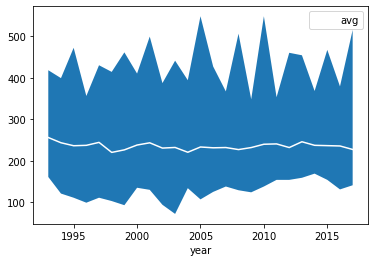

In [145]:
import numpy as np
import datetime
print(datetime.timedelta(seconds=np.median(df["duration_sec"])))
print(datetime.timedelta(seconds=np.min(df["duration_sec"])))
print(datetime.timedelta(seconds=np.max(df["duration_sec"])))

data = df.groupby('year')['duration_sec'].agg(avg='mean',low='min',high='max')
data.reset_index(inplace=True)

ax  = data.plot(x='year', y='avg', c='white')
plt.fill_between(x='year',y1='low' ,y2='high', data=data)

In [139]:
data

,year,avg,low,high
0,1993,255.940000,161.0,418.0
1,1994,243.370000,121.0,399.0
2,1995,236.190000,111.0,472.0
3,1996,237.140000,99.0,356.0
4,1997,244.250000,111.0,430.0
5,1998,220.150000,103.0,414.0
6,1999,226.260000,93.0,461.0
7,2000,237.850000,135.0,410.0
8,2001,243.240000,130.0,499.0
9,2002,230.550000,94.0,387.0


In [104]:
import csv

df.to_csv('Hottest_100', index=False)

In [106]:
import matplotlib.pyplot as plt
title_words=[]
for i, row in df.iterrows():
    arr = df.at[i,"title"].split(" ")
    for item in arr:
        title_words.append(item.lower())
    

rm = ['','(feat.',"a","of","to","in","on","&","is","this","the","mix)","for","are","and"]
#for word in rm:
#    title_words.remove(word)


#counter=pd.DataFrame(title_words).stack(level=0).value_counts()[0:50]
#plt.bar(counter.index,counter.values)
#counter

In [107]:
title_words

['asshole',
 'creep',
 'linger',
 'no',
 'rain',
 'cannonball',
 'killing',
 'in',
 'the',
 'name',
 'lemon',
 'go',
 'the',
 'honeymoon',
 'is',
 'over',
 'stone',
 'me',
 'into',
 'the',
 'groove',
 'everybody',
 'hurts',
 'plush',
 'soul',
 'to',
 'squeeze',
 'i',
 'held',
 'her',
 'in',
 'my',
 'arms',
 'wild',
 'america',
 'sister',
 'havana',
 'hits',
 'from',
 'the',
 'bong',
 'go',
 'west',
 'trout',
 '(feat.',
 'michael',
 'stipe)',
 'heart-shaped',
 'box',
 'black',
 'stick',
 'the',
 'ship',
 'song',
 '(live)',
 'human',
 'behaviour',
 "what's",
 'up?',
 'feed',
 'the',
 'tree',
 'somewhere',
 'sober',
 'are',
 'you',
 'gonna',
 'go',
 'my',
 'way',
 'all',
 'that',
 'she',
 'wants',
 'constant',
 'craving',
 'numb',
 'jessie',
 'pets',
 'cantaloop',
 '(flip',
 'fantasia)',
 'shoop',
 'the',
 'right',
 'time',
 'my',
 'sister',
 'get',
 'me',
 'friday',
 "i'm",
 'in',
 'love',
 'push',
 "th'",
 'little',
 'daisies',
 'world',
 'turning',
 '(r√§wak',
 'mix)',
 'dreams',
 'che

In [157]:
title_clean = title_words
for word in rm:
    title_clean=list(filter(lambda a: a != word, title_clean))
    
counter=pd.DataFrame(title_clean).stack(level=0).value_counts()[0:25]
#plt.bar(counter.index,counter.values)
counter

you      131
i        117
me        88
my        66
love      65
it        62
your      55
like      34
up        33
song      33
all       30
don't     29
down      27
no        27
be        25
one       23
with      23
do        22
way       21
get       20
i'm       19
not       19
black     18
girl      18
go        18
dtype: int64

In [97]:
title_words

True

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                2501 non-null   int64 
 1   title               2501 non-null   object
 2   artist              2501 non-null   object
 3   duration            2501 non-null   object
 4   country             2501 non-null   object
 5   contains_profanity  2501 non-null   object
dtypes: int64(1), object(5)
memory usage: 117.4+ KB


In [201]:
from wordcloud import WordCloud

wc = WordCloud()
wc.generate(",".join(title_clean))


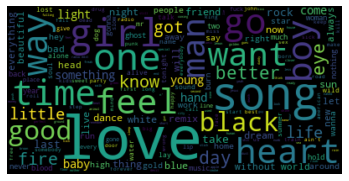

In [202]:
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [164]:
#max_dur = max(df["duration_sec"])
df[df["duration_sec"]==max(df["duration_sec"])]

,year,title,artist,duration,country,contains_profanity,duration_sec,duration_delta
1260,2005,Jesus Of Suburbia,Green Day,9:08,USA,False,548.0,0 days 00:09:08
1714,2010,Runaway (feat. Pusha T),Kanye West,9:08,USA,False,548.0,0 days 00:09:08


In [175]:
pd.DataFrame(df["artist"]).stack(level=0).value_counts()[0:20]

Powderfinger                22
Foo Fighters                22
Grinspoon                   17
Muse                        17
Hilltop Hoods               17
Silverchair                 17
The Living End              16
The John Butler Trio        16
Regurgitator                15
Placebo                     14
Pearl Jam                   14
You Am I                    14
Something For Kate          14
Green Day                   13
Arctic Monkeys              12
Eskimo Joe                  12
Florence And The Machine    12
The Smashing Pumpkins       12
Red Hot Chili Peppers       12
Garbage                     12
dtype: int64

In [197]:
df[df["contains_profanity"]==True].groupby(['artist']).size().reset_index(name='counts').sort_values(by="counts",ascending=False)[0:4]

,artist,counts
30,Machine Gun Fellatio,4
29,Luscious Jackson,2
41,Queens Of The Stone Age,2
42,Regurgitator,2


In [203]:
df[df["artist"]=="Machine Gun Fellatio"]

,year,title,artist,duration,country,contains_profanity,duration_sec,duration_delta
658,1999,Mutha Fukka On A Motorcycle,Machine Gun Fellatio,2:21,Australia,True,141.0,0 days 00:02:21
715,2000,Unsent Letter,Machine Gun Fellatio,5:12,Australia,False,312.0,0 days 00:05:12
766,2000,Mutha Fukka On A Motorcycle,Machine Gun Fellatio,2:21,Australia,True,141.0,0 days 00:02:21
829,2001,The Girl Of My Dreams Is Giving Me Nightmares,Machine Gun Fellatio,3:31,Australia,False,211.0,0 days 00:03:31
905,2002,Rollercoaster,Machine Gun Fellatio,3:33,Australia,False,213.0,0 days 00:03:33
907,2002,Pussy Town,Machine Gun Fellatio,2:59,Australia,True,179.0,0 days 00:02:59
958,2002,Take It Slow,Machine Gun Fellatio,3:49,Australia,False,229.0,0 days 00:03:49
1087,2003,Voices In My Head,Machine Gun Fellatio,3:28,Australia,False,208.0,0 days 00:03:28
1133,2004,What The Fuck?,Machine Gun Fellatio,4:12,Australia,True,252.0,0 days 00:04:12


In [244]:
#df.groupby(['title']).size().reset_index(name='counts').sort_values(by="counts",ascending=False)
df[df["title_length"]==max(df["title_length"])]

,year,title,artist,duration,country,contains_profanity,duration_sec,duration_delta,title_length
980,2002,"You Think I Ain't Worth A Dollar, But I Feel...",Queens Of The Stone Age,3:13,USA,False,193.0,0 days 00:03:13,13.0


In [245]:
df[df["duration_sec"]==max(df["duration_sec"])]

,year,title,artist,duration,country,contains_profanity,duration_sec,duration_delta,title_length
1260,2005,Jesus Of Suburbia,Green Day,9:08,USA,False,548.0,0 days 00:09:08,3.0
1714,2010,Runaway (feat. Pusha T),Kanye West,9:08,USA,False,548.0,0 days 00:09:08,4.0


In [225]:
df.groupby(['country']).size().reset_index(name='counts')

,country,counts
0,Australia,1107
1,Benin,2
2,Canada,48
3,Denmark,3
4,England,397
5,Finland,1
6,France,20
7,Germany,10
8,Guernsey,1
9,Iceland,12


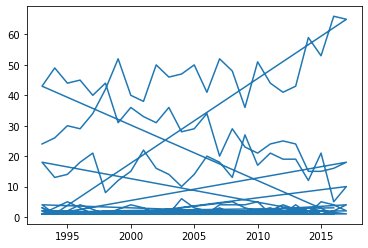

In [241]:
d = df.groupby(['country','year']).size().reset_index(name='counts')
plt.plot(d["year"],d['counts'])


In [243]:
df.to_csv('Hottest_100_enhanced.csv', index=False)